 **DecisionTreeRegressor**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

data = pd.read_csv("/content/CarPrice_Assignment.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
print(data.describe())

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

In [ ]:
data.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

<ipython-input-6-304581fcc834>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.price)


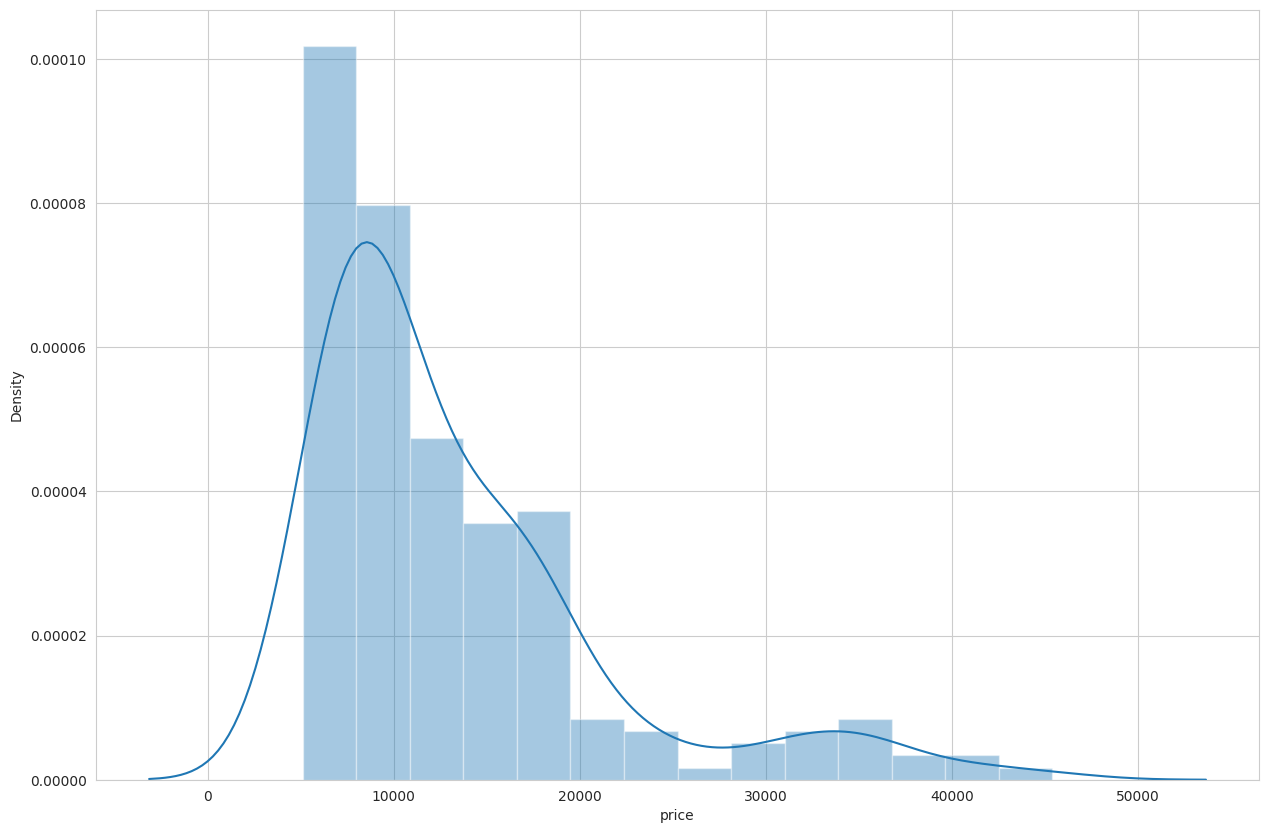

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.price)
plt.show()

In [ ]:
print(data.corr())

                    car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm          -0.203789   0.273606  -0.360469  -

<ipython-input-7-40835d1ef585>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())


<ipython-input-8-555d4168b84a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()


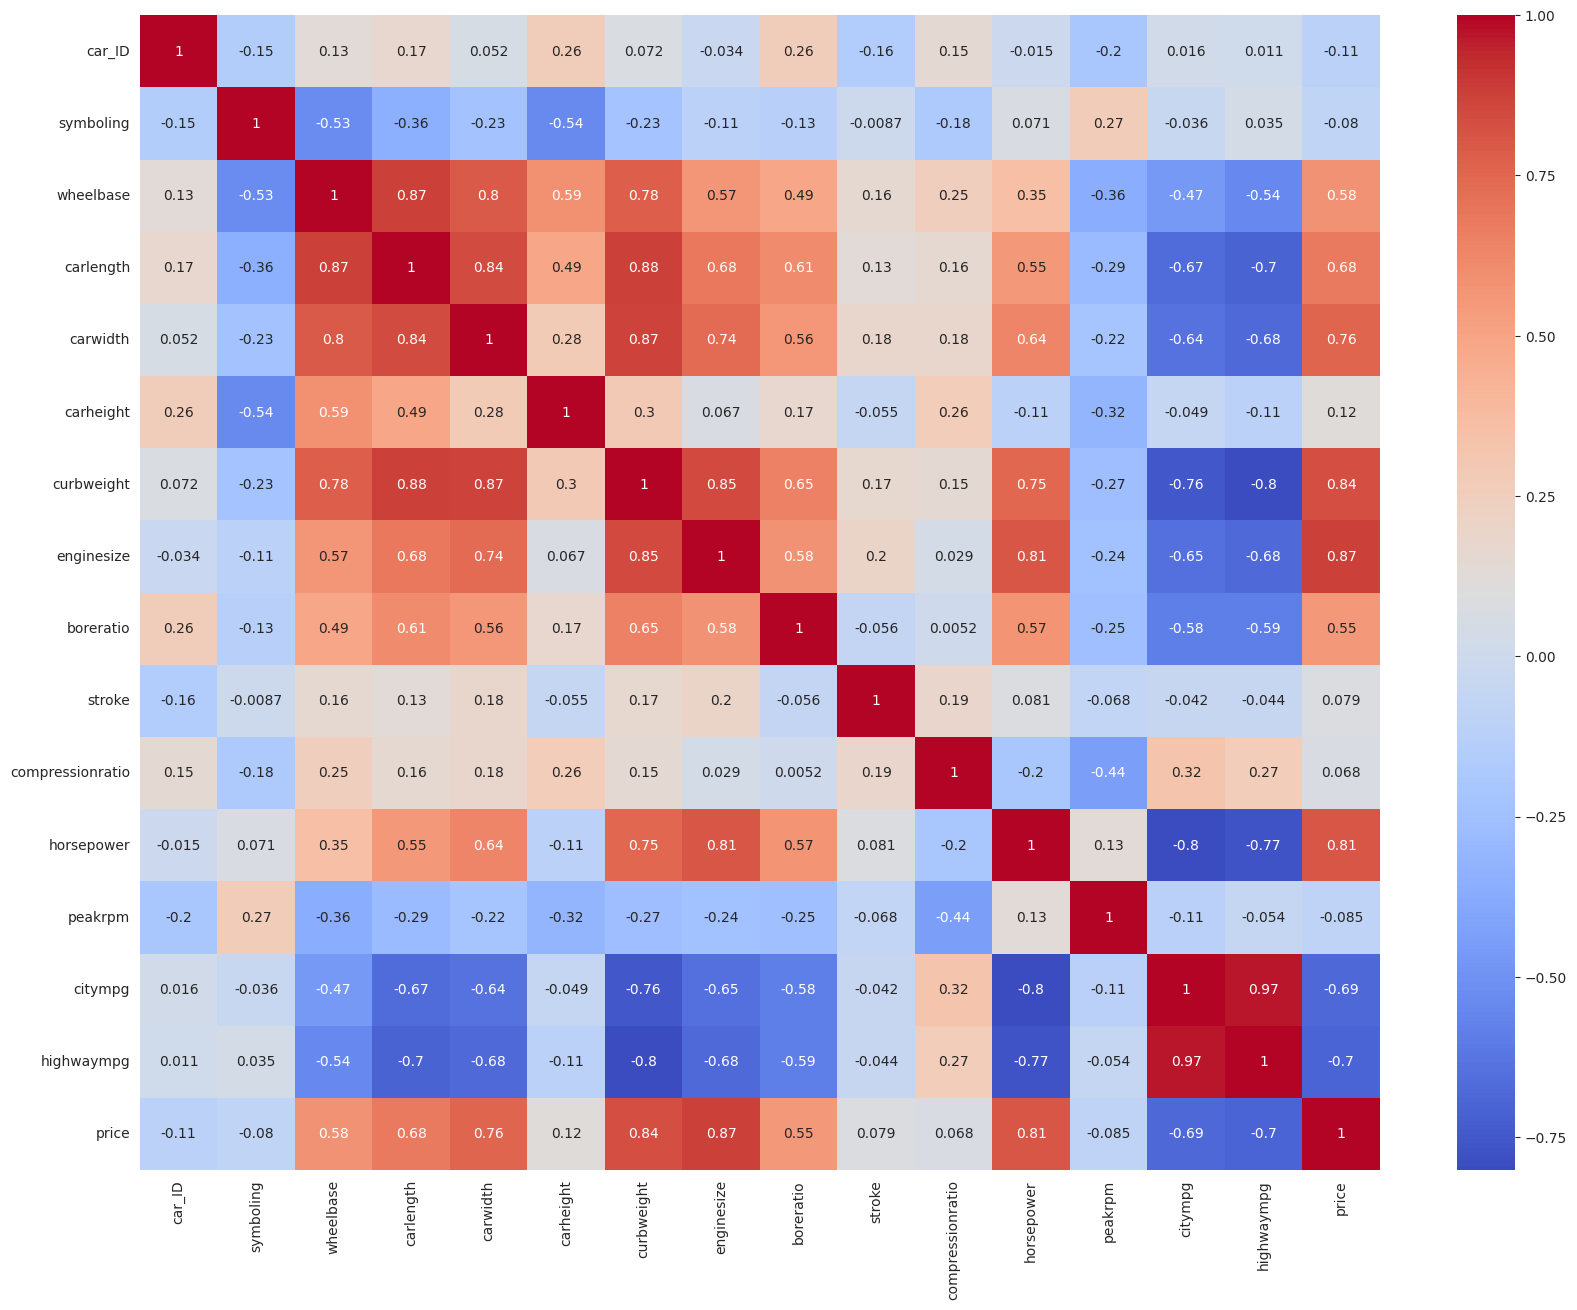

In [ ]:
plt.figure(figsize=(20, 15))
correlations = data.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [ ]:
predict = "price"
data = data[["symboling", "wheelbase", "carlength",
             "carwidth", "carheight", "curbweight",
             "enginesize", "boreratio", "stroke",
             "compressionratio", "horsepower", "peakrpm",
             "citympg", "highwaympg", "price"]]
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
model.score(xtest, predictions)

<ipython-input-9-56df943d8afb>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop([predict], 1))


1.0

**Random Forest Regressor**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error



# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

# Create and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators as needed
model.fit(xtrain, ytrain)

# Make predictions
predictions = model.predict(xtest)

# Evaluate the model using mean absolute error
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 1769.0821218699186


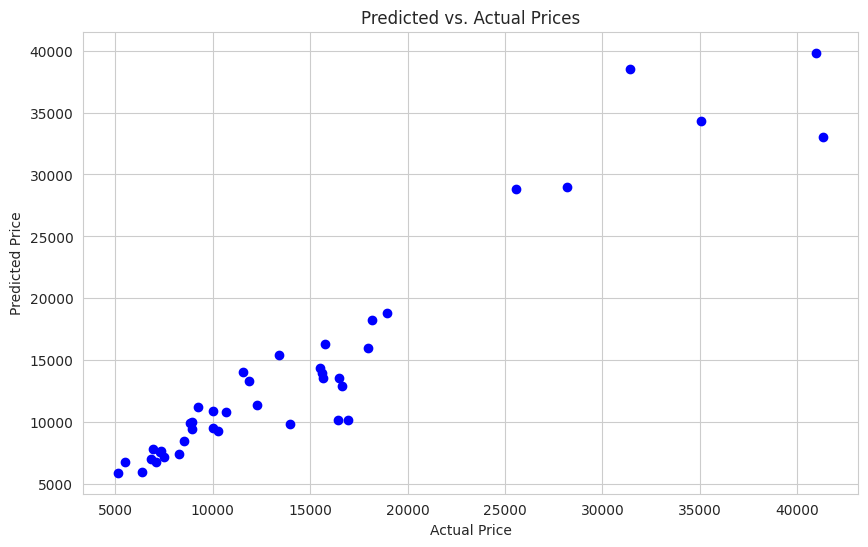

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot: Predicted vs. Actual Prices
plt.figure(figsize=(10, 6))
plt.scatter(ytest, predictions, color='blue')
plt.title('Predicted vs. Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()


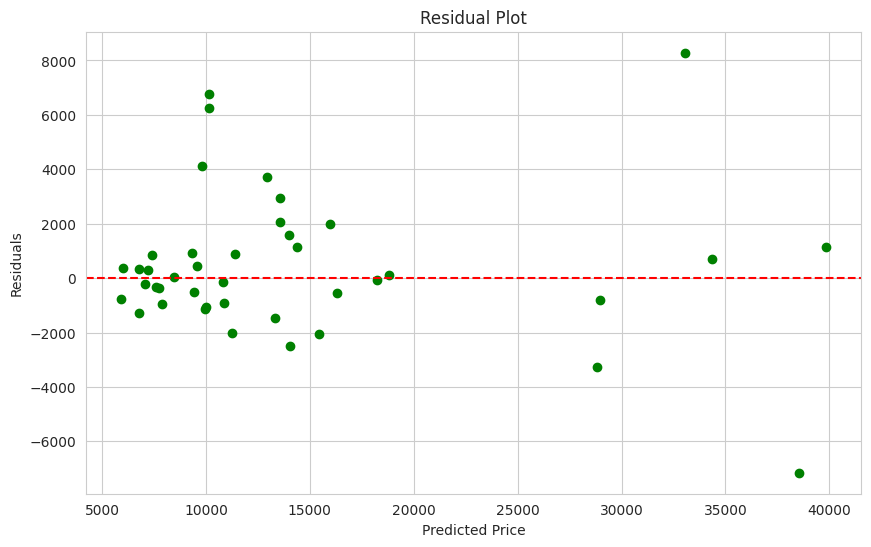

In [ ]:
# Residual plot: Residuals vs. Predicted Prices
residuals = ytest - predictions
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.show()


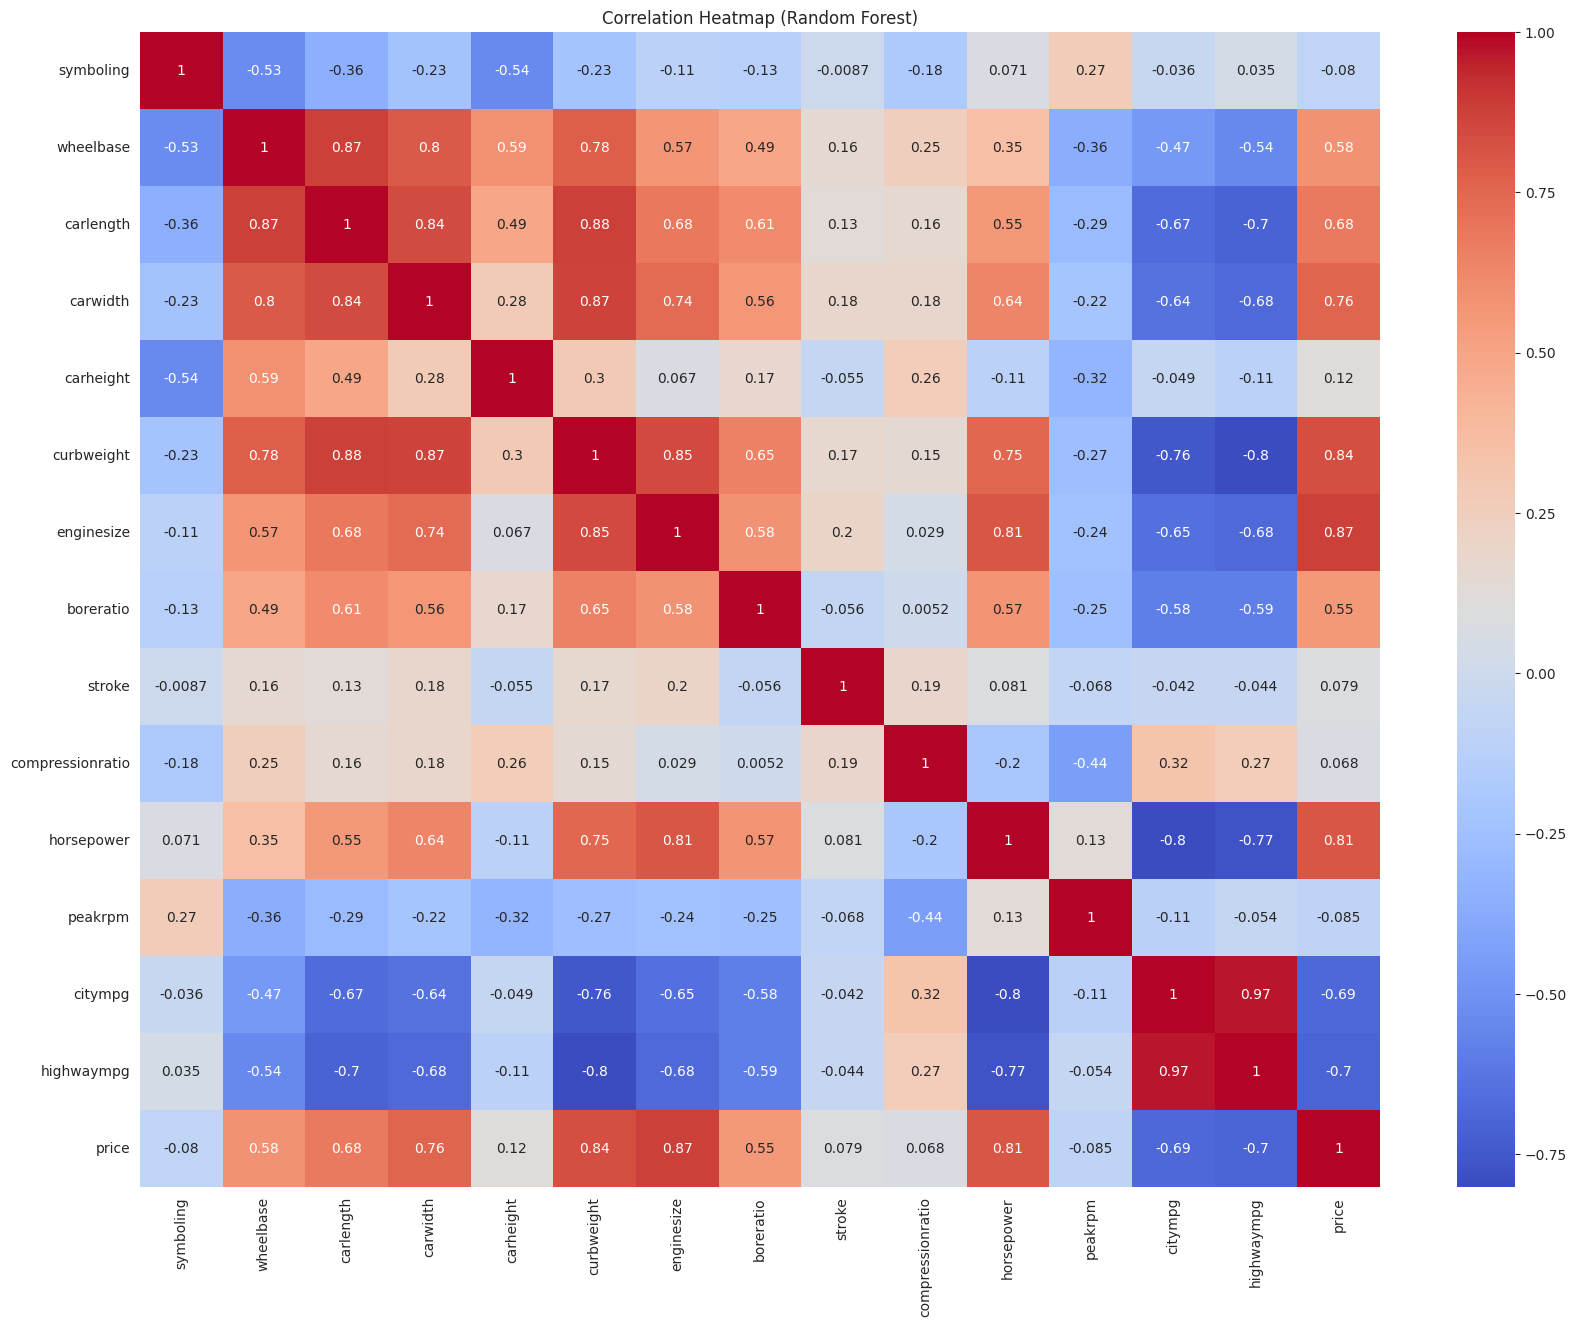

In [ ]:
plt.figure(figsize=(20, 15))
correlations = data.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.title('Correlation Heatmap (Random Forest)')
plt.show()

<ipython-input-14-2abcb40169f6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.price)


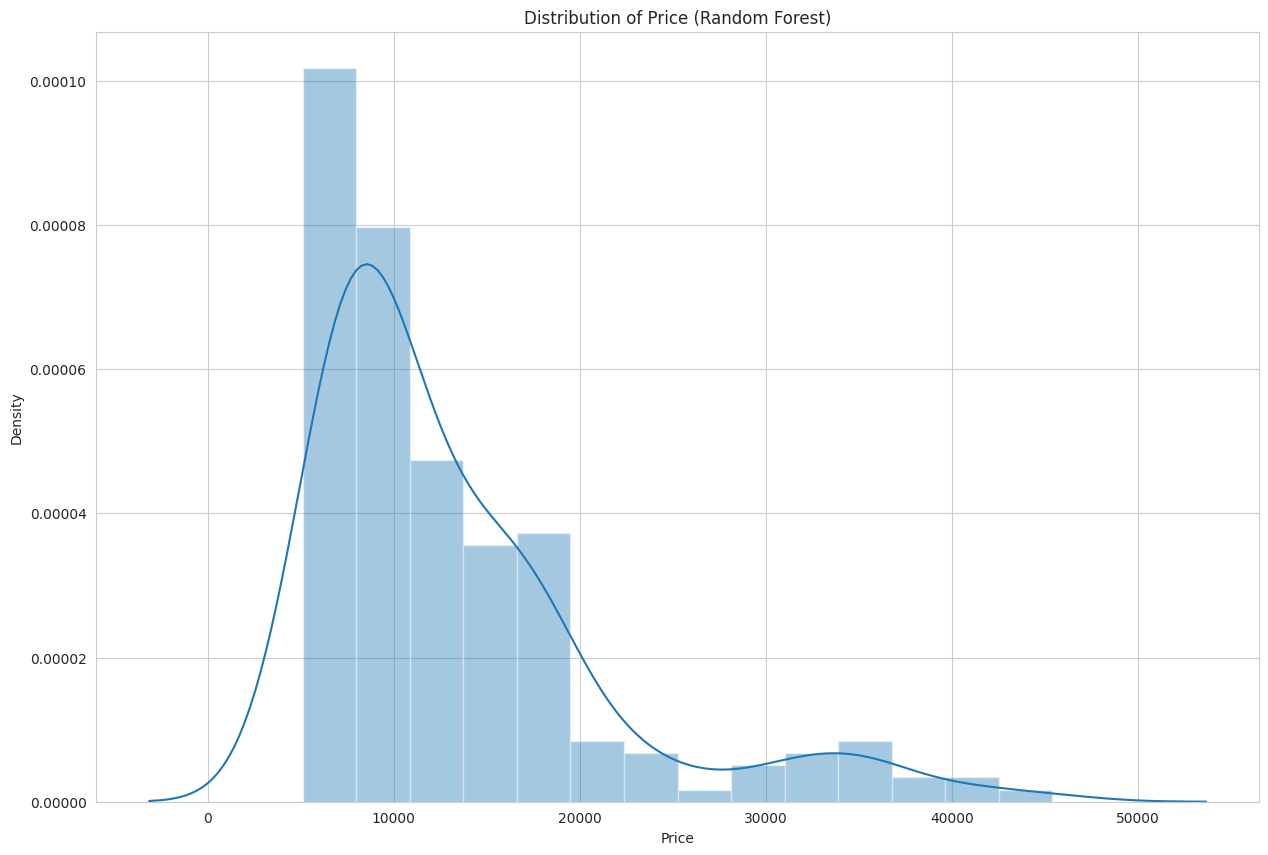

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.price)
plt.title('Distribution of Price (Random Forest)')
plt.xlabel('Price')
plt.show()

**SVR**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Assuming you've already defined 'data', 'predict', 'x', and 'y' as before

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

# Create and train the Support Vector Regressor (SVR) model
model = SVR(kernel='linear')  # You can choose different kernels like 'linear', 'poly', 'rbf', etc.
model.fit(xtrain, ytrain)

# Make predictions
predictions = model.predict(xtest)

# Evaluate the model using mean absolute error
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 2810.7220767962967


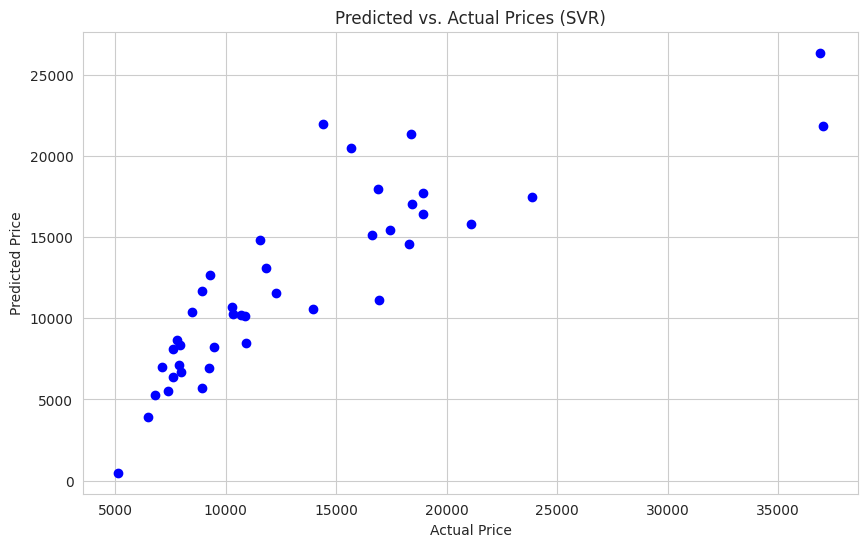

In [ ]:
# Scatter plot: Predicted vs. Actual Prices
plt.figure(figsize=(10, 6))
plt.scatter(ytest, predictions, color='blue')
plt.title('Predicted vs. Actual Prices (SVR)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

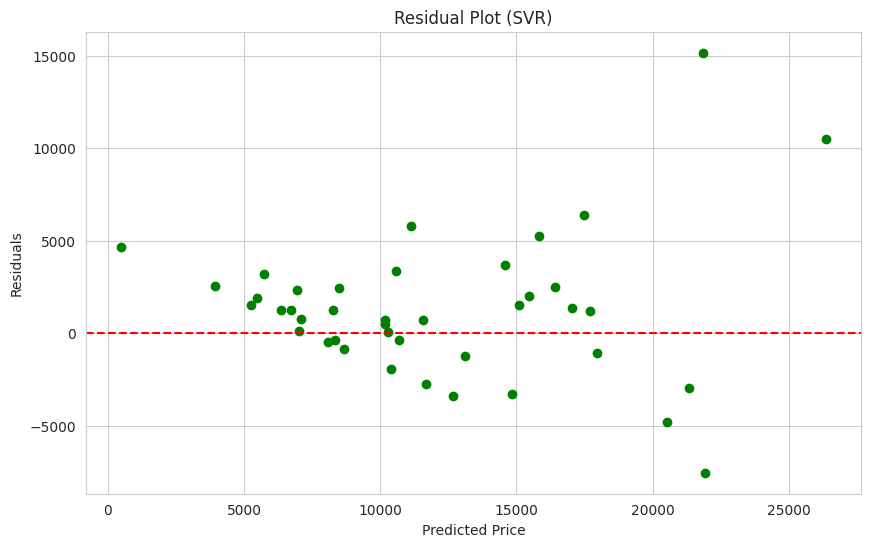

In [ ]:
# Residual plot: Residuals vs. Predicted Prices
residuals = ytest - predictions
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot (SVR)')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.show()

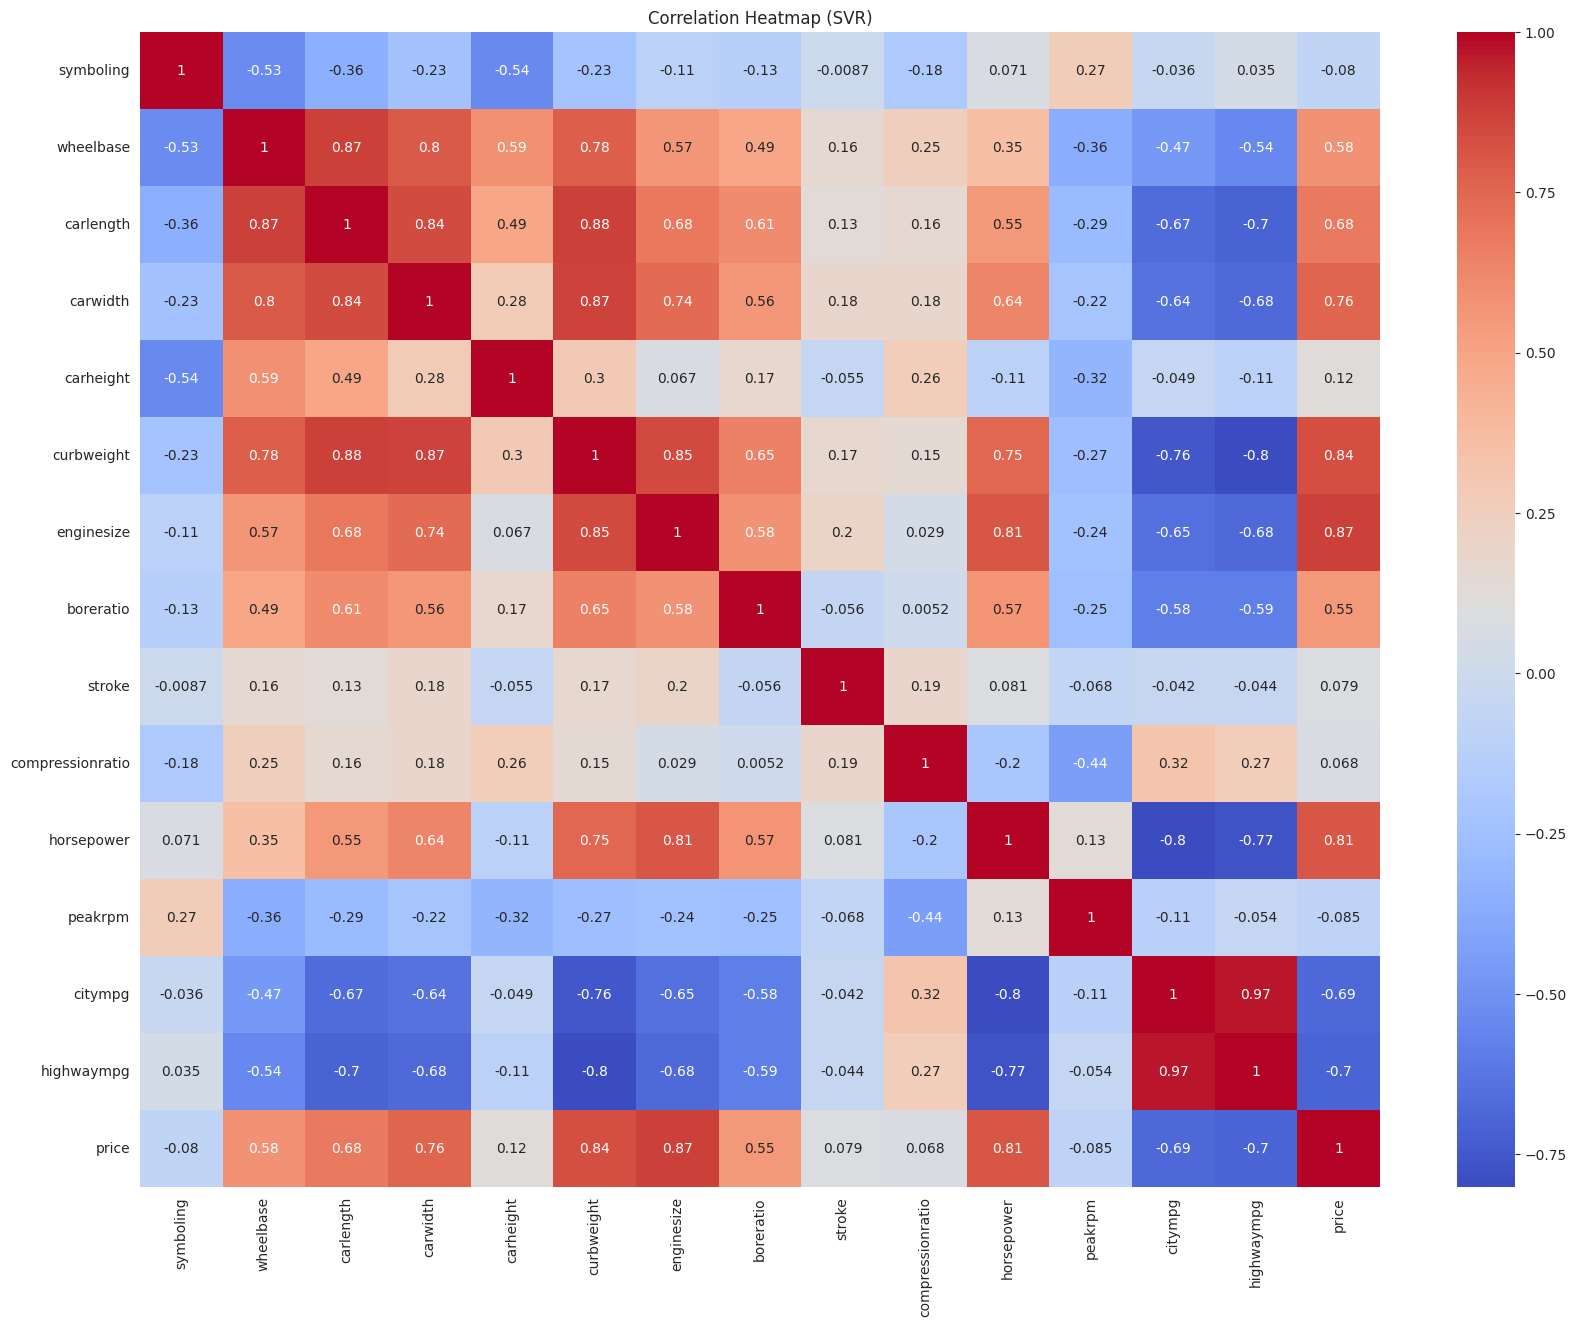

In [ ]:
plt.figure(figsize=(20, 15))
correlations = data.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.title('Correlation Heatmap (SVR)')
plt.show()

<ipython-input-19-e417a6a2c738>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.price)


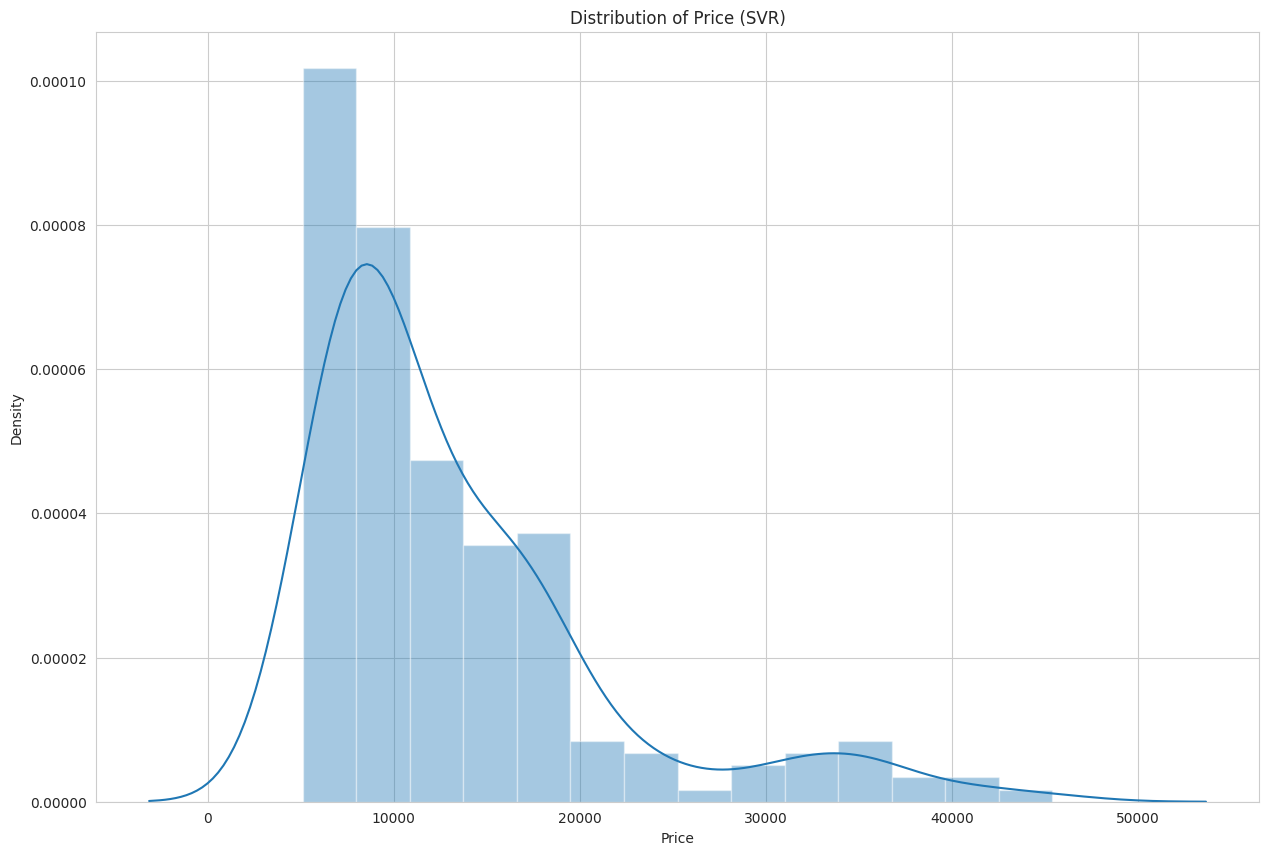

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.price)
plt.title('Distribution of Price (SVR)')
plt.xlabel('Price')
plt.show()

**Gradient Boosting Regressor**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Assuming you have already loaded and prepared your 'data' DataFrame

predict = "price"
data = data[["symboling", "wheelbase", "carlength",
             "carwidth", "carheight", "curbweight",
             "enginesize", "boreratio", "stroke",
             "compressionratio", "horsepower", "peakrpm",
             "citympg", "highwaympg", "price"]]

x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

# Create a Gradient Boosting Regressor model
model = GradientBoostingRegressor()

# Train the model
model.fit(xtrain, ytrain)

# Make predictions
predictions = model.predict(xtest)

# Calculate Mean Absolute Error
mae = mean_absolute_error(ytest, predictions)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 1693.9441751226873


<ipython-input-20-18f093dc3cb7>:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop([predict], 1))


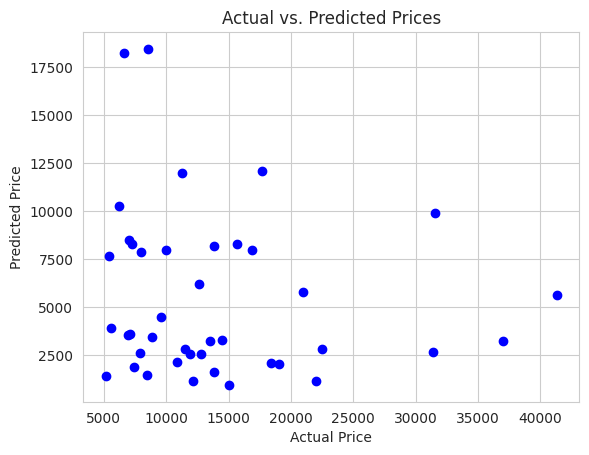

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot to compare actual vs. predicted prices
plt.scatter(ytest, predictions, color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices")
plt.show()


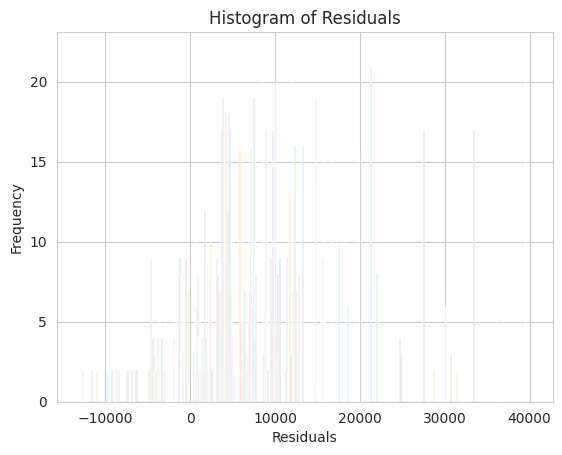

In [ ]:
plt.hist(residuals, bins=20, alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()


****

In [ ]:
!pip install tensorflow

**Neural Networks**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
from tensorflow.keras import layers

# Assuming you have already loaded and prepared your 'data' DataFrame

predict = "price"
data = data[["symboling", "wheelbase", "carlength",
             "carwidth", "carheight", "curbweight",
             "enginesize", "boreratio", "stroke",
             "compressionratio", "horsepower", "peakrpm",
             "citympg", "highwaympg", "price"]]

x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

# Standardize the features
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

# Create a simple neural network model
model = keras.Sequential([
    layers.Input(shape=(xtrain.shape[1],)),  # Input layer
    layers.Dense(64, activation='relu'),     # Hidden layer
    layers.Dense(32, activation='relu'),     # Hidden layer
    layers.Dense(1)                          # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(xtrain_scaled, ytrain, epochs=100, batch_size=32, verbose=1)

# Make predictions
predictions = model.predict(xtest_scaled)

# Calculate Mean Absolute Error
mae = mean_absolute_error(ytest, predictions)
print(f"Mean Absolute Error: {mae}")


<ipython-input-35-3301e12742af>:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop([predict], 1))


Epoch 1/100
6/6 [==============================] - 2s 5ms/step - loss: 244421488.0000
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 244408400.0000
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 244395680.0000
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 244383312.0000
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 244368640.0000
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 244353728.0000
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 244335088.0000
Epoch 8/100
6/6 [==============================] - 0s 7ms/step - loss: 244312560.0000
Epoch 9/100
6/6 [==============================] - 0s 9ms/step - loss: 244287120.0000
Epoch 10/100
6/6 [==============================] - 0s 12ms/step - loss: 244257136.0000
Epoch 11/100
6/6 [==============================] - 0s 9ms/step - loss: 244222832.0000
Epoch 12/100
6/6 [==============================] 

Training Loss Over Epochs

Epoch 1/100
6/6 [==============================] - 0s 4ms/step - loss: 110830520.0000
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 108432544.0000
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 105896200.0000
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 103339688.0000
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 100666088.0000
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 98367112.0000
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 96021752.0000
Epoch 8/100
6/6 [==============================] - 0s 5ms/step - loss: 93672376.0000
Epoch 9/100
6/6 [==============================] - 0s 4ms/step - loss: 91442728.0000
Epoch 10/100
6/6 [==============================] - 0s 5ms/step - loss: 89210952.0000
Epoch 11/100
6/6 [==============================] - 0s 6ms/step - loss: 87185016.0000
Epoch 12/100
6/6 [==============================] - 0s 5ms

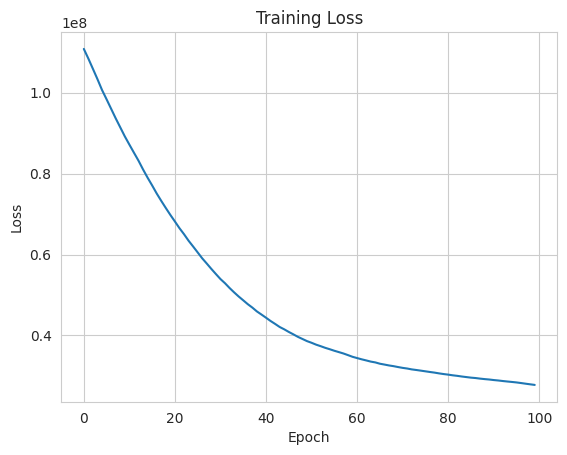

In [ ]:
import matplotlib.pyplot as plt

history = model.fit(xtrain_scaled, ytrain, epochs=100, batch_size=32, verbose=1)

plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


Actual vs. Predicted Values

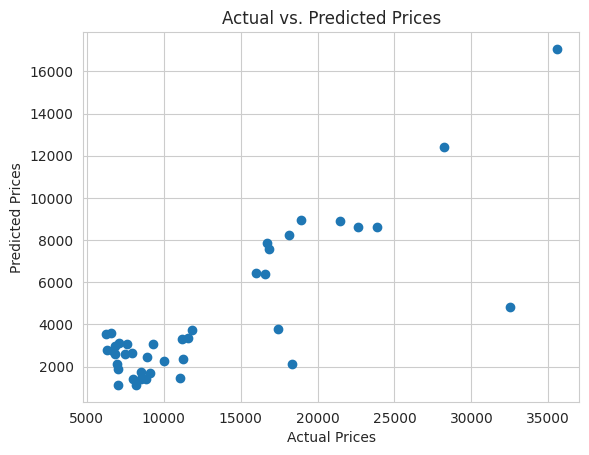

In [ ]:
plt.scatter(ytest, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()


Residual Plot

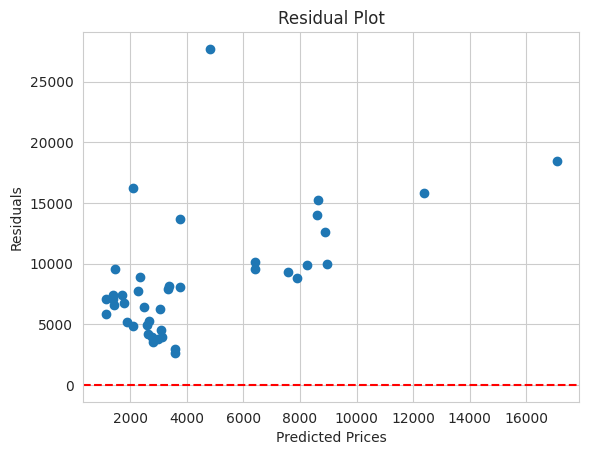

In [ ]:
residuals = ytest - predictions.flatten()
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


Histogram of Residuals

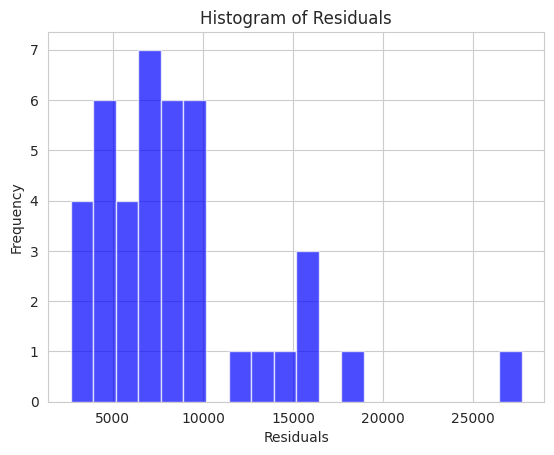

In [ ]:
plt.hist(residuals, bins=20, color='blue', alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()


Box Plot of Residuals

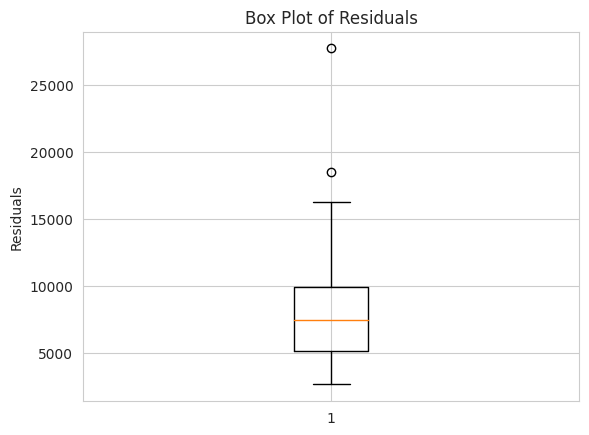

In [ ]:
plt.boxplot(residuals)
plt.ylabel('Residuals')
plt.title('Box Plot of Residuals')
plt.show()


**XGBoost and LightGBM**

In [ ]:
!pip install xgboost

In [ ]:
!pip install lightgbm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
import lightgbm as lgb

# Assuming you have already loaded and prepared your 'data' DataFrame

predict = "price"
data = data[["symboling", "wheelbase", "carlength",
             "carwidth", "carheight", "curbweight",
             "enginesize", "boreratio", "stroke",
             "compressionratio", "horsepower", "peakrpm",
             "citympg", "highwaympg", "price"]]

x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

# XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(xtrain, ytrain)
xgb_predictions = xgb_model.predict(xtest)
xgb_mae = mean_absolute_error(ytest, xgb_predictions)
print(f"XGBoost Mean Absolute Error: {xgb_mae}")

# LightGBM
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(xtrain, ytrain)
lgb_predictions = lgb_model.predict(xtest)
lgb_mae = mean_absolute_error(ytest, lgb_predictions)
print(f"LightGBM Mean Absolute Error: {lgb_mae}")


<ipython-input-26-176fc851f79d>:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop([predict], 1))


XGBoost Mean Absolute Error: 1712.460080030488
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 380
[LightGBM] [Info] Number of data points in the train set: 164, number of used features: 14
[LightGBM] [Info] Start training from score 13014.235780
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

Actual vs. Predicted Values for XGBoost

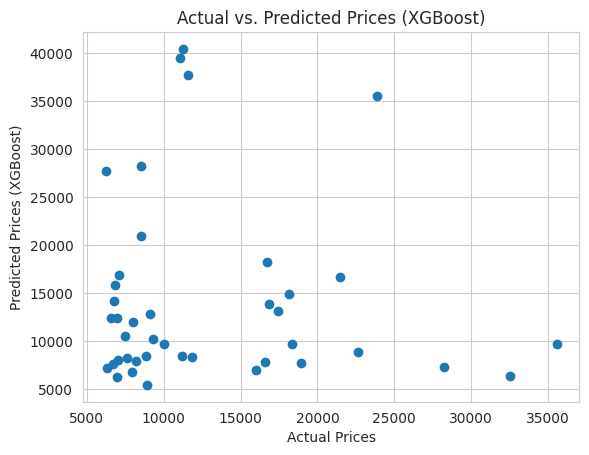

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(ytest, xgb_predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices (XGBoost)')
plt.title('Actual vs. Predicted Prices (XGBoost)')
plt.show()


Residual Plot for XGBoost

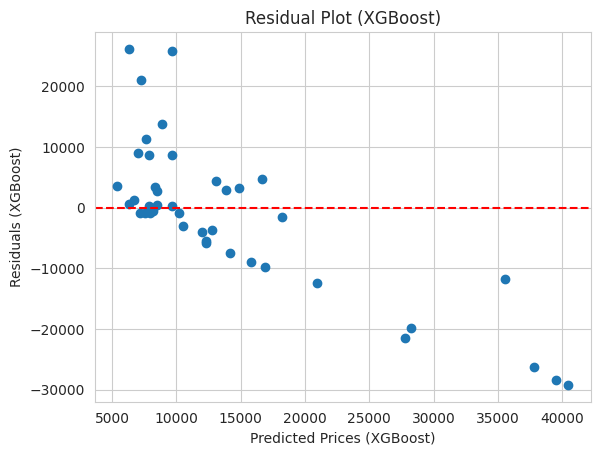

In [ ]:
xgb_residuals = ytest - xgb_predictions
plt.scatter(xgb_predictions, xgb_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices (XGBoost)')
plt.ylabel('Residuals (XGBoost)')
plt.title('Residual Plot (XGBoost)')
plt.show()


Actual vs. Predicted Values for LightGBM

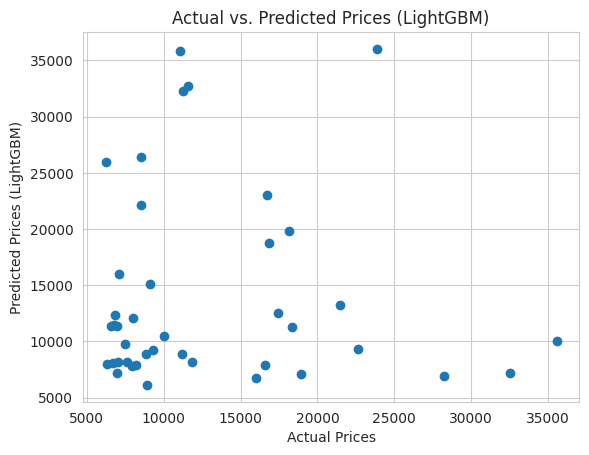

In [ ]:
plt.scatter(ytest, lgb_predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices (LightGBM)')
plt.title('Actual vs. Predicted Prices (LightGBM)')
plt.show()


Residual Plot for LightGBM

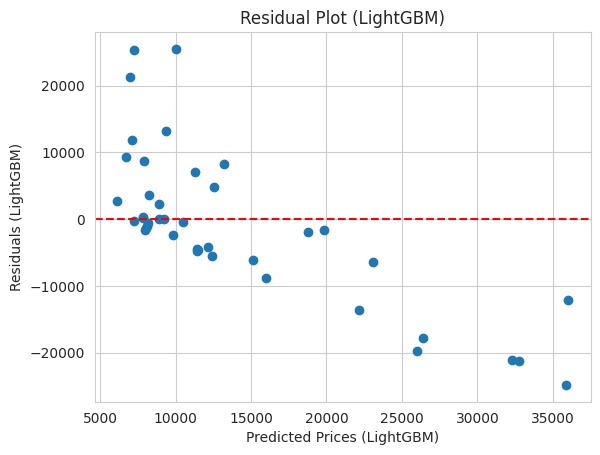

In [ ]:
lgb_residuals = ytest - lgb_predictions
plt.scatter(lgb_predictions, lgb_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices (LightGBM)')
plt.ylabel('Residuals (LightGBM)')
plt.title('Residual Plot (LightGBM)')
plt.show()


Comparison of Mean Absolute Errors

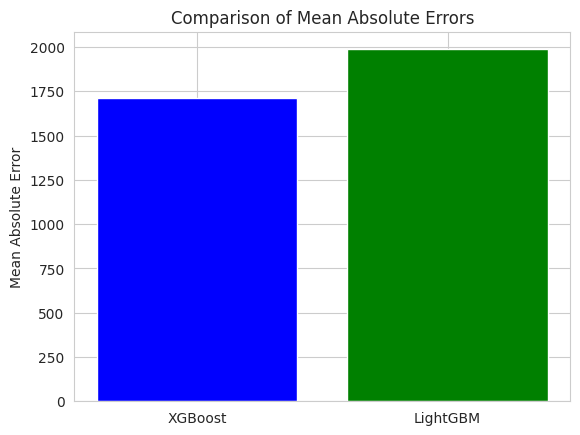

In [ ]:
models = ['XGBoost', 'LightGBM']
mae_values = [xgb_mae, lgb_mae]

plt.bar(models, mae_values, color=['blue', 'green'])
plt.ylabel('Mean Absolute Error')
plt.title('Comparison of Mean Absolute Errors')
plt.show()


**Ridge and Lasso Regression**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Assuming you have already loaded and prepared your 'data' DataFrame

predict = "price"
data = data[["symboling", "wheelbase", "carlength",
             "carwidth", "carheight", "curbweight",
             "enginesize", "boreratio", "stroke",
             "compressionratio", "horsepower", "peakrpm",
             "citympg", "highwaympg", "price"]]

x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

# Standardize the features
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the value of alpha
ridge_model.fit(xtrain_scaled, ytrain)
ridge_predictions = ridge_model.predict(xtest_scaled)
ridge_mae = mean_absolute_error(ytest, ridge_predictions)
print(f"Ridge Regression Mean Absolute Error: {ridge_mae}")

# Lasso Regression
lasso_model = Lasso(alpha=0.01)  # You can adjust the value of alpha
lasso_model.fit(xtrain_scaled, ytrain)
lasso_predictions = lasso_model.predict(xtest_scaled)
lasso_mae = mean_absolute_error(ytest, lasso_predictions)
print(f"Lasso Regression Mean Absolute Error: {lasso_mae}")


Ridge Regression Mean Absolute Error: 2946.7259006854492
Lasso Regression Mean Absolute Error: 2938.274551899196


<ipython-input-27-63a10bd66f09>:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop([predict], 1))


Actual vs. Predicted Values for Ridge Regression

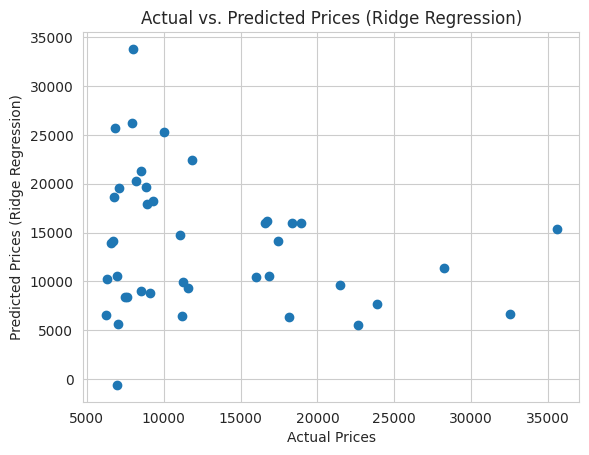

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(ytest, ridge_predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices (Ridge Regression)')
plt.title('Actual vs. Predicted Prices (Ridge Regression)')
plt.show()


Residual Plot for Ridge Regression

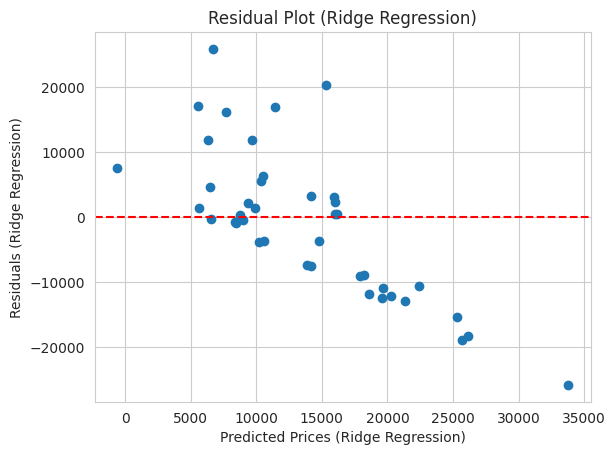

In [ ]:
ridge_residuals = ytest - ridge_predictions
plt.scatter(ridge_predictions, ridge_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices (Ridge Regression)')
plt.ylabel('Residuals (Ridge Regression)')
plt.title('Residual Plot (Ridge Regression)')
plt.show()


Actual vs. Predicted Values for Lasso Regression

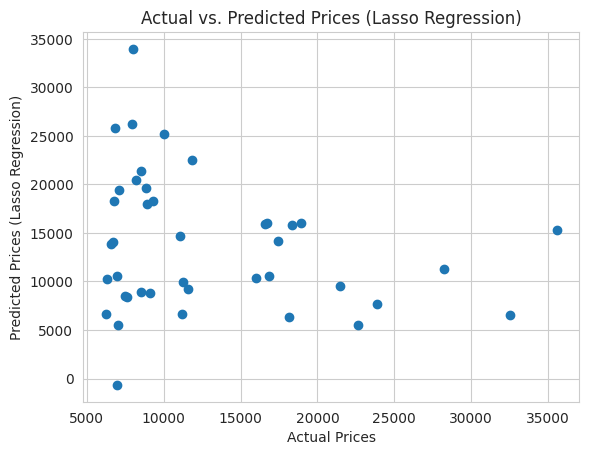

In [ ]:
plt.scatter(ytest, lasso_predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices (Lasso Regression)')
plt.title('Actual vs. Predicted Prices (Lasso Regression)')
plt.show()


Residual Plot for Lasso Regression

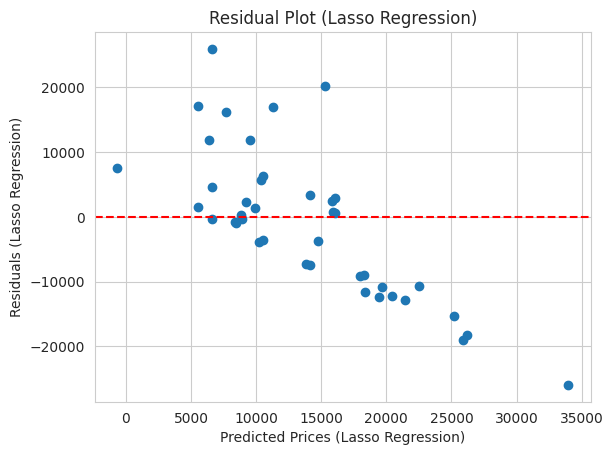

In [ ]:
lasso_residuals = ytest - lasso_predictions
plt.scatter(lasso_predictions, lasso_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices (Lasso Regression)')
plt.ylabel('Residuals (Lasso Regression)')
plt.title('Residual Plot (Lasso Regression)')
plt.show()


Comparison of Mean Absolute Errors

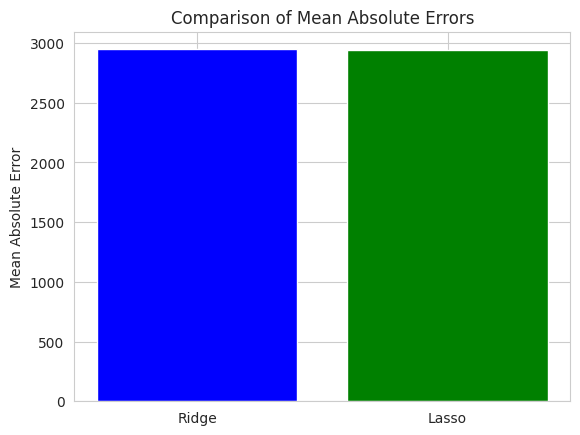

In [ ]:
models = ['Ridge', 'Lasso']
mae_values = [ridge_mae, lasso_mae]

plt.bar(models, mae_values, color=['blue', 'green'])
plt.ylabel('Mean Absolute Error')
plt.title('Comparison of Mean Absolute Errors')
plt.show()


Model		Mean Absolute Error
-------------------------------------
Ridge		2946.7259
Lasso		2938.2746
XGBoost		1712.4601


NameError: ignored